# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>
## <center>Trabajo Práctico 1 : Reservas de Hotel </center>
#### Grupo 29:
* Alen Davies Leccese - 107084
* Luca Lazcano - 107044

## Tabla de contenidos
- [Importación y configuración](#Imports-y-configs)



#### Imports y configs

Importamos las librerias y creamos el dataframe

In [250]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('./Datasets/hotels_train.csv')
df.drop(columns=['reservation_status_date'], inplace=True)

hotel = df.copy()

## Análisis Exploratorio y Preprocesamiento de Datos

### **Exploración inicial**

#### Primera aproximación a los datos

Primero vemos cómo están organizados los datos, imprimiendo algunas filas:

In [ ]:
hotel.sample(5)

Vemos que el dataset contiene información sobre las reservas en dos hoteles distintos.

In [ ]:
hotel.hotel.value_counts()

Luego vemos el tipo de dato de cada columna y determinamos a qué tipo de variable corresponde, así sabemos el análisis que se le puede efectuar.

In [ ]:
hotel.info()

Vemos que hay un mix de variables, cualitativas, ordinales y cuantitativas (discretas y continuas). Se observa que están representadas por varios tipos de datos. Por ejemplo algunas que son de tipo numérico, son cualitativas, como por ejemplo 'agent' y 'company'. El número seguramente representa un índice o id. Otras columnas son "booleanas", el valor numérico representa "verdadero" o "falso". Normalmente un 1 en dicha columna será verdadero, y un 0, falso. Estas columnas son 'is_repeated_guest' e 'is_canceled'.

Vemos si hay duplicados en el dataset:

In [ ]:
print(f'Cantidad de filas duplicadas: {hotel.duplicated().sum()}')

In [ ]:
hotel.head()

#### Variables cualitativas

Para las variables cualitativas se pueden determinar los valores posibles, y a qué corresponden.

In [ ]:
cualitativas = hotel[['hotel','arrival_date_week_number', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'agent', 'company', 'customer_type', 'is_canceled', 'agent', 'company']]
cualitativas

La variable 'hotel' puede tomar los siguientes valores:

In [ ]:
hotel['hotel'].value_counts()

La variable 'arrival_date_month' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_month'].value_counts()

La variable 'arrival_date_week_number' puede tomar los siguientes valores:

In [ ]:
hotel['arrival_date_week_number'].value_counts().sort_index()

La variable 'meal' puede tomar los siguientes valores:

In [ ]:
hotel['meal'].value_counts().sort_index()

La variable 'country' puede tomar los siguientes valores:

In [ ]:
hotel['country'].value_counts()

La variable 'market_segment' puede tomar los siguientes valores:

In [ ]:
hotel['market_segment'].value_counts()


La variable 'distribution_channel' puede tomar los siguientes valores:

In [ ]:
hotel['distribution_channel'].value_counts()


La variable 'is_repeated_guest' puede tomar los siguientes valores:

In [ ]:
hotel['is_repeated_guest'].value_counts()

La variable 'reserved_room_type' puede tomar los siguientes valores:

In [ ]:
hotel['reserved_room_type'].value_counts().sort_index()

La variable 'assigned_room_type' puede tomar los siguientes valors:

In [ ]:
hotel['assigned_room_type'].value_counts().sort_index()


La variable 'deposit_type' puede tomar los siguientes valores:

In [ ]:
hotel['deposit_type'].value_counts()

La variable 'agent' puede tomar los siguientes valores:

In [ ]:
hotel['agent'].value_counts()

La variable 'company' puede tomar los siguientes valores:

In [ ]:
hotel['company'].value_counts()


La variable 'customer_type' puede tomar los siguientes valores:

In [ ]:
hotel['customer_type'].value_counts()

La variable 'is_canceled' puede tomar los siguientes valores:

In [ ]:
hotel['is_canceled'].value_counts()


#### Variables cuantitativas

Para las variables cuantitativas se pueden calcular las medidas de resumen, "estadísticas", como media, mediana y moda.

In [ ]:
cuantitativas = hotel[['lead_time', 'arrival_date_year', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']]
cuantitativas.describe()

#### Variables irrelevantes para el análisis

Para el análisis de los datos podemos considerar que la variable 'id' será irrelevante ya que no aporta información sobre las reservas de los hoteles, es solamente un identificador de cada una.

Además de esta, es difícil determinar qué variable será irrelevante, antes de haberlas analizado y visto cómo se relacionan entre ellas y con el target 'is_canceled'.

In [ ]:
hotel.drop(columns=['id'], inplace=True)

#### Análisis gráfico distribuciones de las variables

Analizamos la distribución de todas las variables, tanto cualitativas como cuantitativas.

##### *Variables cualitativas*

Primero analizamos la distribucion de las variables cualitativas:

In [ ]:
sns.countplot(x='hotel', data=cualitativas)

In [ ]:
sns.countplot(x='customer_type', data=cualitativas)

In [ ]:
sns.countplot(x='deposit_type', data=cualitativas)

In [ ]:
sns.countplot(x='distribution_channel', data=cualitativas)

In [ ]:
sns.countplot(x='market_segment', data=cualitativas)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

In [ ]:
sns.countplot(y='country', data=cualitativas, order=cualitativas['country'].value_counts().iloc[:20].index)

In [ ]:
room_types = hotel[['assigned_room_type', 'reserved_room_type']].copy()

room_types_melted = pd.melt(room_types, value_vars=[
                    'reserved_room_type', 'assigned_room_type'])

sns.histplot(data=room_types_melted, x='value',
             hue='variable', binwidth=1, multiple='dodge')

In [ ]:
sns.countplot(x='is_repeated_guest', data=cualitativas)

In [ ]:
sns.countplot(x='meal', data=cualitativas)

In [ ]:
sns.countplot(x='is_canceled', data=cualitativas)

##### *Variables cuantitativas*

Ahora vemos la distribucion de las variables cuantitativas

In [ ]:
sns.histplot(hotel['lead_time'], bins=30)

In [ ]:
sns.countplot(x='arrival_date_year', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='arrival_date_day_of_month', data = cuantitativas, palette='coolwarm')
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), size=8)

In [ ]:
sns.countplot(x='stays_in_weekend_nights', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='stays_in_week_nights', data = cuantitativas, palette='coolwarm')

In [ ]:
sns.countplot(x='adults', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='children', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='babies', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='is_repeated_guest', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='previous_cancellations', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.histplot(x='previous_bookings_not_canceled', data=cuantitativas)

In [ ]:
sns.countplot(x='booking_changes', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.histplot(x='days_in_waiting_list', data=cuantitativas)

In [ ]:
sns.histplot(x='adr', data=cuantitativas, palette = 'coolwarm', bins=30)

In [ ]:
sns.countplot(x='required_car_parking_spaces', data=cuantitativas, palette = 'coolwarm')

In [ ]:
sns.countplot(x='total_of_special_requests', data=cuantitativas, palette = 'coolwarm')

#### Correlaciones entre variables

Calculamos la matriz de correlaciones para ver las correlaciones entre las variables del dataset.

In [ ]:
matriz_corr = hotel.corr()
matriz_corr

Podemos graficar las correlaciones en un heatmap para que sea mas simple de ver

In [ ]:
fig = plt.figure(figsize=(20,15))
ax = sns.heatmap(data = matriz_corr, annot = True, annot_kws = {"size":12}, cmap='Blues')
ax.set_title('Correlacion entre las variables', fontsize=22)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

No hay variables que tengan una correlacion demasiado alta, es decir, muy cercana a 1. Esto es bueno, ya que no hay variables que esten muy correlacionadas entre si.
Igualmente veremos mas de cerca aquellas variables que tengan un poco de correlacion. 

Las correlaciones con el target 'is_canceled' se analizan más adelante.

Vamos a considerar las correlaciones mayores a 0.3:
- `'stays_in_weekend_nights'` y `'stays_in_week_nights'`
- `'previous_bookings_not_canceled'` y `'is_repeated_guest'`
- `'children'` y `'adr'`

In [ ]:
sns.regplot(x=hotel['stays_in_week_nights'], y=hotel['stays_in_weekend_nights'], line_kws={'color':'red'}).set(xlabel='Noches de semana', ylabel='Noches de fin de semana', title='Noches de semana vs. Noches de fin de semana')
plt.show()

Vemos que poseen una correlacion positiva como también habíamos visto en la matriz de correlaciones.

In [ ]:
sns.regplot(x=hotel['adr'], y= hotel['children'], line_kws={'color':'red'}).set(xlabel='Tarifas', ylabel='Cantidad de Niños', title= 'Cantidad de niños vs Tarifas')
plt.show()

También poseen una correlacion positiva.

In [ ]:
sns.barplot(x=hotel['is_repeated_guest'], y=hotel['previous_bookings_not_canceled'],data=hotel, palette ='Blues').set(xlabel='Es cliente repetido', ylabel='Reservas no canceladas previamente', title= 'Reservas no canceladas previamente vs. Es cliente repetido') 
plt.show()

También podemos ver que hay una correlacion entre estas dos variables ya que las barras tienen una diferencia de altura significativa.

#### Relación de variables con el target

In [ ]:
plt.title("Porcentaje de reservas por estado de la reserva", fontsize = 20, pad = 10)
sns.barplot(x=hotel['is_canceled'].unique(), y=hotel['is_canceled'].value_counts(normalize=True), palette='Blues')
plt.xlabel("Estado de la reserva", fontsize = 12, labelpad = 5)
plt.ylabel("Porcentaje de reservas", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['No Cancelada', 'Cancelada']);

Podemos ver que aproximadamente el 50% de las reservas fueron canceladas.

Ahora me quedo solo con las correlaciones entre las variables y nuestro target ``'is_canceled'``

In [ ]:
correlacion = hotel.corr()
correlacion['is_canceled'].sort_values(ascending=False).reset_index()

Las grafico también en un heatmap para verlas con mayor claridad

In [ ]:
fig = plt.figure(figsize=(5,8))
ax = sns.heatmap(correlacion[['is_canceled']].sort_values('is_canceled', ascending=False), annot = True, cmap='coolwarm')
ax.set_title('Correlacion entre las variables y el target', fontsize=12)

- ``'lead_time'`` es la variable que más está correlacionada con ``'is_canceled'``, nuestro target. Tiene sentido que a medida que pasan los días entre que se realiza la reserva y la fecha de llegada, los clientes tienen más tiempo para cancelar la reserva y hay más tiempo para que surja un imprevisto.
- La segunda variable con mayor correlacion con nuestro target es ``'total_of_special_requests'``. Esto podría pensarse como que el hotel tiene en cuenta las necesidades de los clientes y esto podría hacer que el cliente sea menos propenso a cancelar su reserva.
- ``'required_car_parking_spaces'`` es la tercera variable con mayor correlacion con nuestro target. Parecido a lo que ocurre con ``'total_of_special_requests'``, es lógico que si el cliente se compromente con el hotel (pidiendo un espacio de estacionamiento), será menos probable que cancele su reserva.
- El historial de un cliente con el hotel (``'previous_bookings_not_canceled'`` o ``'is_repeated_guest'``) no parece estar muy relacionado con la cancelación de la reserva. Pero, que un cliente ya haya cancelado reservas en el hotel si está más relacionado con la cancelación de la reserva.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Tiempo de anticipacion medio vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['lead_time'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Tiempo de anticipacion (días)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Las reservas canceladas tienen un tiempo de anticipacion medio más largo.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de solicitudes especiales vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['total_of_special_requests'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Solicitudes especiales", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que cancelan sus reservas hacen menos peticiones especiales.

In [ ]:
plt.figure(figsize=(8,5)) 
plt.title("Cantidad media de lugares de estacionamiento solicitados vs estado de la reserva", fontsize = 18, pad = 10)
sns.barplot(x=hotel['is_canceled'], y=hotel['required_car_parking_spaces'], palette='coolwarm')
plt.xlabel("Estado de la reserva", fontsize = 12)
plt.ylabel("Lugares de estacionamiento solicitados", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=['No cancelada', 'Cancelada']);

Los clientes que no cancelan sus reservas tienden a solicitar más lugares de estacionamiento.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de habitacion reservada", fontsize = 20, pad = 10)
sns.barplot(x=hotel['reserved_room_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de habitación", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que reservaron los tipos de habitación P y L tienen el mayor porcentaje de cancelación de reservas, con un 100% de reservas canceladas.

In [ ]:
plt.figure(figsize=(10,5)) 
plt.title("Porcentaje de reservas canceladas por tipo de depósito", fontsize = 20, pad = 10)
sns.barplot(x=hotel['deposit_type'], y=hotel['is_canceled'], palette='coolwarm')
plt.xlabel("Tipo de depósito", fontsize = 12)
plt.ylabel("Porcentaje de reservas canceladas", fontsize = 12);

Los clientes que pagan un depósito no reembolsable tienen un porcentaje mucho mayor de reservas canceladas.

In [ ]:
sns.countplot(x='customer_type', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
pd.crosstab(hotel['customer_type'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

Podemos ver que el tipo de cliente que más cancela sus reservas es el cliente Transient-Party, seguido por el Transient y el Contract. El Group es el que menos cancela sus reservas.

In [ ]:
sns.countplot(x='is_repeated_guest', data=hotel, hue='is_canceled', palette='coolwarm')

In [ ]:
pd.crosstab(hotel['is_repeated_guest'], hotel['is_canceled']).apply(lambda x: x/x.sum(), axis=1).sort_values(by=1, ascending=False)

Podemos ver que si un cliente ya ha reservado en el hotel, es menos probable que cancele su reserva y si no ha reservado en el hotel, es más probable que cancele su reserva.

### **Visualización de los datos**

En esta sección exploraremos los datos visualmente, para encontrar relaciones entre variables.

### **Datos faltantes**

Como los modelos de ML no pueden trabajar con datos faltantes, debemos tratarlos de alguna forma.

#### Análisis

Obtengo una tabla con la cantidad y el porcentaje de nulos por columna:

In [ ]:

# Obtengo una serie con la suma de nulos por columna.
cols_null = hotel.isna().sum()

# Filtro las columnas para quedarme solo con las que tienen nulos.
# Luego, reseteo el índice y renombro las columnas.
cols_null = cols_null[cols_null > 0].reset_index().rename(
    columns={'index': 'Columna', 0: 'Cant. nulos'})

# Ordeno las columnas por cantidad de nulos.
cols_null = cols_null.sort_values(
    by='Cant. nulos', ascending=False)

# Agrego una columna con el porcentaje de nulos respecto a la cantidad total de datos.
cols_null['% nulos'] = (cols_null['Cant. nulos'] /
                        hotel.shape[0] * 100).round(3)

cols_null

Entonces, hay 4 columnas que tienen valores nulos:
- ``children`` tiene 4 valores nulos (0,01%)
- ``country`` tiene 221 valores nulos (0,36%)
- ``agent`` tiene 7890 valores nulos (12,7%)
- ``company`` tiene 58761 valores nulos (94,9%)

Grafico los porcentajes de nulos por columna:

In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'company'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'agent'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'country'])


In [ ]:
sns.barplot(x='Columna', y='% nulos',
            data=cols_null.loc[cols_null['Columna'] == 'children'])


Viendo el dataset, vimos que existen múltiples columnas con cantidad 0 de adultos. Si bien esto no es un dato nulo, ya que es una cantidad posible, consideramos anormal que ningún adulto esté presente en una reserva. Por lo tanto, consideramos estos datos como faltantes o mal cargados. Veamos cuántas reservas hay de este tipo:

In [ ]:
hotel.loc[hotel['adults'] == 0].value_counts().sum()


Apenas 197 reservas tienen 0 adultos. Esto representa una cantidad ínfima sobre el total del dataset:

In [ ]:
hotel.loc[hotel['adults'] == 0].value_counts().sum() / hotel.shape[0] * 100

Esto representa un 0,32% del total de las reservas, por lo que eliminamos estos registros sin temor a afectar el modelo.

In [ ]:
hotel = hotel.loc[hotel['adults'] > 0]

#### Revisión y decisión

##### Nulos en ``children``

Según el paper, no deberían existir valores faltantes. Es raro entonces encontrar que 4 observaciones de la columna ``children`` son raros. Por el ínfimo porcentaje que estos representan, podemos simplemente eliminar las filas que tienen este dato faltante, sin mayores consecuencias.

In [ ]:
hotel.dropna(subset=['children'], inplace=True)

In [ ]:
print("Cantidad de registros", hotel.shape[0])

Confirmamos que se eliminaron 4 registros del dataset.

##### Nulos en ``country``

El paper también da información al respecto de los valores faltantes en la columna ``country``:
> It is also common for hotels not to know the correct nationality of the customer until the moment of check-in.

Nos aclaran que es común que los hoteles no conozcan la nacionalidad del cliente hasta el momento del check-in. Por ello, podemos asumir que los valores faltantes en esta columna son válidos, y se pueden imputar por un valor que represente este desconocimiento.

Esto resuelve el problema a fines del análisis de los datos, pero no para el entrenamiento del modelo de ML. Una decisión deberá tomarse respecto a estos datos para evitar un sesgo incorrecto en el entrenamiento del modelo, considerando que nacionalidades conocidas recién al momento del check-in bien pudieron haber sido originalmente registradas como desconocidas.

Este hecho puede influenciar la predicción del modelo de forma negativa, insertando un sesgo incorrecto en el entrenamiento del modelo.

Reemplazamos los valores nulos de la columna ``country`` por el valor 'Desconocido'.

In [ ]:
# Replace null values in 'country' column with 'Unknown'
hotel['country'].fillna('Desconocido', inplace=True)

##### Nulos en ``company`` y ``agent``

En la columna ``company``, el 95% de los registros tienen ``null`` como valor. En principio, nos inclinamos a pensar que este dato casi no fue registrado, o falta para la mayoría de los registros. Pero revisando el paper, nos encontramos con la siguiente aclaración:

> The PMS assured no missing data exists in its database tables. However, in some categorical
variables like Agent or Company, “NULL” is presented as one of the categories. This should not be
considered a missing value, but rather as “not applicable”. For example, if a booking “Agent” is defined as “NULL” it means that the booking did not came from a travel agent.

En criollo, nos aclaran que ``null`` en esta columna no debería interpretarse como dato faltante, sino como "no aplica". Para las columnas ``company`` y ``agent``, un valor ``null`` debería entenderse como "no reservó a través de compañía/agente".

Ignorar estos datos puede causar que perdamos información que podría resultar útil para entrenar el modelo. ¿Es posible que exista una correlación entre la compañía usada y la cancelación? ¿Entre el agente y cancelación? ¿Y si en realidad lo que importa es el hecho de reservar por agente, compañía o personalmente; y no específicamente a través de cuál?

Es necesario responder estas preguntas para poder tratar correctamente con estos datos. Se nos ocurren dos alternativas:
- Reconvertir las columnas a un dato booleano, que indique si se usó o no agente/compañía.
- Interpretar a los ``null`` como un agente o compañía más.

La primera opción sería la mejor, se acota considerablemente el rango de valores posibles, pero no se pierde toda la información. Si la cantidad de agentes/compañías repetidos es bajísimo (casi todas las reservas se hacen con agentes/compañías distintas), casi no se podría inferir información. Que una vez un agente haya cancelado, puede sentar un mal precedente, pero de ningún modo se deduce que otra reserva realizada por otro agente, también se cancelará. También, si resulta que todos los agentes/compañías cancelan con más o menos la misma frecuencia; sería un indicador de que el dato específico de quién/cuál agente/compañía reserva es indistinto. Estas opciones indican que se puede simplificar a la primera opción sin pérdida de información.

Si, por el contrario, hay algunos agentes/compañías presentes en muchos registros, y se puede deducir algo de ello, quizás no sea conveniente reconvertir las columnas a booleanos. Si un agente reservó 1000 veces, y canceló 999... ya un sustento más fuerte para creer que volverá a cancelar.

Este análisis corresponde a la etapa de ingeniería de *features*. Por ahora, y con el propósito de avanzar con la limpieza de los datos, reemplazaremos los valores por 'Sin agente' y 'Sin compañía', según corresponda.

In [ ]:
hotel['agent'].fillna('Sin agente', inplace=True)

In [ ]:
# Replace null values in 'company' column with 'Sin compania'
hotel['company'].fillna('Sin compania', inplace=True)

Finalmente, verificamos que ya no existan valores nulos en el dataset.

In [ ]:
hotel.isna().sum().sum()

Nuestro dataset parcial ``hotel`` está libre de valores faltantes o nulos.

#### Comparaciones

Una vez eliminados o tratados valores nulos, es necesario volver a examinar la distribución de los datos, para verificar que no hayan sido alterados de forma significativa.

Las columnas modificadas fueron ``country``, ``children``, ``agent`` y ``company``. Veamos cómo se distribuyen ahora.

Por la gran cantidad de países únicos en el dataset, no es posible graficarlos todos. Por ello, graficamos los 15 países con mayor cantidad de registros.

In [ ]:
sns.countplot(x='country', data=hotel, order=hotel['country'].value_counts().iloc[:15].index)

No hay cambios apreciables en la distribución de los datos, porque los valores faltantes eran pocos, y fueron corregidos sin alterar los demás registros.

Ahora la distribución de la columna ``children``:

In [ ]:
sns.countplot(x='children', data=hotel)

La distribución no cambiar. La cantidad de registros eliminados (4) en irrelevante.

Respecto a la columna ``company``, la distribución es la siguiente:

In [ ]:
sns.countplot(x='company', data=hotel, order=hotel['company'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso la distribución se altera totalmente. Al tener en cuenta los valores faltantes, el valor "Sin compañía" (que eran los nulos), pasó a estar muy representada.

Respecto a la columna ``agent``, la distribución es la siguiente:

In [ ]:
sns.countplot(x='agent', data=hotel, order=hotel['agent'].value_counts().iloc[:15].index)

plt.xticks(rotation=90)
plt.show()

En este caso también se altera la distribución, vemos que "Sin agente" pasó al segundo puesto, pero el agente "índice 9" sigue en el primer lugar, y son comparables en el orden de magnitud.

Concluimos que los cambios realizados no alteraron la distribución de los datos de forma significativa, pero pusieron un evidencia datos que se encontraban "ocultos" por ser nulos.

### **Data cleaning**

#### Tipos de datos

Verificamos los tipos de datos de las variables del dataset.

In [ ]:
hotel.dtypes

Vemos que hay variables que tienen un tipo de dato inconsistente con su contenido.
- ``children`` debería ser de tipo numérico, no tiene sentido que sea de tipo float.
- ``agent`` y ``company`` deberían ser de tipo numérico, ya que son categóricas, representan a distintos agentes y vendedores.


Realizamos la conversión de tipos de datos.

In [ ]:
hotel['children'] = hotel['children'].astype('int')

hotel['agent'] = hotel['agent'].astype('int')

hotel['company'] = hotel['company'].astype('int')

Revisamos nuevamente los tipos de datos:

In [ ]:
hotel.dtypes

#### Ingeniería de features

En primer lugar, observamos que tenemos tres columnas distintas que representan el año, mes y día de la fecha de llegada de los clientes. Podemos unificarlas en una sola columna, que represente la fecha de llegada.

Combinamos las columnas `'arrival_date_year'`, `'arrival_date_month'`, `'arrival_date_day_of_month'` en una sola columna `'arrival_date'` de tipo datetime, y dropeamos las columnas anteriores.

In [ ]:
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date_year'].astype(str) + '-' + hotel['arrival_date_month'] + '-' + hotel['arrival_date_day_of_month'].astype(str))

hotel.drop(columns=['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], inplace=True)

Verificamos que se hayan convertido correctamente:

In [ ]:
hotel.arrival_date

### **Valores atípicos**

#### Análisis univariado

In [252]:
hotel_cpy = hotel.copy()

##### Outliers univariados en ``'adr'``

Vamos a intentar identificar outliers univariados mediante el análisis de boxplots.

<Axes: ylabel='adr'>

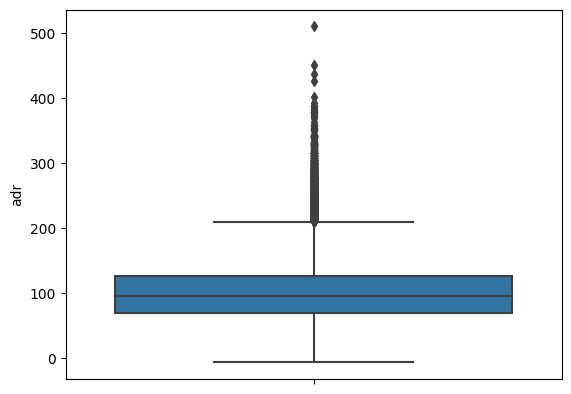

In [253]:
sns.boxplot(y=hotel.adr)

In [254]:
hotel.adr.agg(['min','max']).reset_index()

,index,adr
0,min,-6.38
1,max,510.00


Podemos ver que la variable ``'adr'`` parece tener outliers. Además, vemos que su mínimo es -6.38 y su máximo es 510.

In [255]:
Q1_altura = np.quantile(hotel.adr,0.25)
Q3_altura = np.quantile(hotel.adr,0.75)

IQR_altura = Q3_altura-Q1_altura

out_inf = Q1_altura-1.5*IQR_altura
out_sup = Q3_altura+1.5*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers moderados inferiores.')
print('Valores por arriba de', out_sup, 'son outlier moderados superiores.')

Valores por debajo de -14.0 son outliers moderados inferiores.
Valores por arriba de 210.0 son outlier moderados superiores.


In [256]:
out_inf = Q1_altura-3*IQR_altura
out_sup = Q3_altura+3*IQR_altura
print('Valores por debajo de', out_inf, 'son outliers severos inferiores.')
print('Valores por arriba de', out_sup, 'son outlier severos superiores.')

Valores por debajo de -98.0 son outliers severos inferiores.
Valores por arriba de 294.0 son outlier severos superiores.


Considerando estos valores y los max y min de ``'adr'``, podemos ver que tiene outliers superiores tanto moderados como severos, pero no se detectan outliers inferiores.

In [257]:
outliers = hotel[hotel['adr']>294].sort_values(by='adr', ascending=False)
outliers

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
55460,City Hotel,0,2017,May,19,9,0,1,1,0.0,...,No Deposit,159.0,NaN,0,Transient,510.00,0,0,fe474061-f3b2-4e15-8ba0-672366ab7ef1,0
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0.0,...,No Deposit,314.0,NaN,0,Transient,450.00,0,0,3342817f-3e59-40a4-8b8a-8a7ba49e3184,1
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2.0,...,No Deposit,250.0,NaN,0,Transient,437.00,0,0,f4678f81-0634-4705-95fb-84262ace90fc,1
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2.0,...,No Deposit,250.0,NaN,0,Transient,426.25,0,2,ccc86404-4867-4942-b984-b0a0a56451be,0
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,No Deposit,240.0,NaN,0,Transient,402.00,0,1,7948179b-85f7-4764-ae7e-3647bf1693f8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30970,City Hotel,44,2017,April,16,20,0,3,2,2.0,...,No Deposit,8.0,NaN,0,Transient,295.00,0,2,1fb043f6-ee57-450d-871d-05df60730a44,0
38203,Resort Hotel,109,2017,July,31,30,2,5,2,0.0,...,No Deposit,240.0,NaN,0,Transient,294.86,0,1,3d1ddd9b-4199-4142-bb50-8fb13380c253,1
61256,City Hotel,18,2017,May,19,10,2,9,2,0.0,...,No Deposit,8.0,NaN,0,Transient,294.55,0,1,8eedbc18-d965-44e8-8a95-17a668f1a772,1
33083,Resort Hotel,116,2017,August,32,9,2,8,2,1.0,...,No Deposit,5.0,NaN,0,Transient,294.50,0,2,24dfd306-ebd0-44a8-803a-a4720c97aa4a,1


Ahora probemos calculando el z-score

In [258]:
media_adr =  np.mean(hotel_cpy.adr)
std_adr = np.std(hotel_cpy.adr)
hotel_cpy['z_adr'] = (hotel_cpy.adr - media_adr)/std_adr

In [259]:
hotel_cpy[hotel_cpy['z_adr']>3].sort_values(by='z_adr', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr
55460,City Hotel,0,2017,May,19,9,0,1,1,0.0,...,159.0,NaN,0,Transient,510.00,0,0,fe474061-f3b2-4e15-8ba0-672366ab7ef1,0,8.535169
50240,Resort Hotel,378,2017,August,31,1,4,10,2,0.0,...,314.0,NaN,0,Transient,450.00,0,0,3342817f-3e59-40a4-8b8a-8a7ba49e3184,1,7.278815
54002,Resort Hotel,59,2017,August,33,13,2,4,2,2.0,...,250.0,NaN,0,Transient,437.00,0,0,f4678f81-0634-4705-95fb-84262ace90fc,1,7.006605
8690,Resort Hotel,31,2017,August,31,1,2,6,2,2.0,...,250.0,NaN,0,Transient,426.25,0,2,ccc86404-4867-4942-b984-b0a0a56451be,0,6.781509
60071,Resort Hotel,104,2017,August,33,17,2,3,3,1.0,...,240.0,NaN,0,Transient,402.00,0,1,7948179b-85f7-4764-ae7e-3647bf1693f8,0,6.273732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21137,Resort Hotel,39,2016,August,35,24,2,4,2,0.0,...,240.0,NaN,0,Transient,246.00,0,2,3d5cf86c-81ad-4b75-a6b4-136fc20437a1,0,3.007213
865,Resort Hotel,99,2016,December,53,26,2,5,3,1.0,...,240.0,NaN,0,Transient,246.00,0,0,6b240e49-43ee-4b21-aa7f-1f33cd24f707,0,3.007213
2391,Resort Hotel,37,2016,August,32,5,0,2,2,0.0,...,240.0,NaN,0,Transient,246.00,0,2,a5e78e7e-1ecc-48c7-a358-fa4120fbf1f6,0,3.007213
42676,City Hotel,40,2016,August,33,13,1,1,2,2.0,...,14.0,NaN,0,Transient,245.95,1,0,8d33fffb-537c-42e8-ba6b-ca2f9f8caa4c,0,3.006166


In [260]:
hotel_cpy[hotel_cpy['z_adr']<-3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr


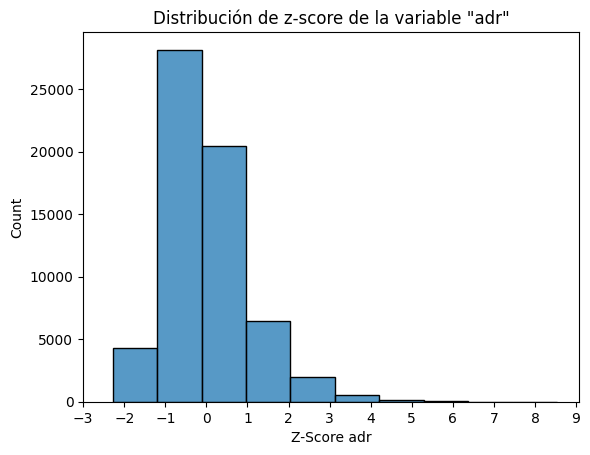

In [305]:
sns.histplot(hotel_cpy.z_adr, bins=10).set(title='Distribución de z-score de la variable "adr"', xlabel='Z-Score adr')

plt.xticks(np.arange(-3, 10, 1))
plt.show()

Concluimos en que se detectan outliers superiores, pero no inferiores.

Teniendo en cuenta el análisis del boxplot y el cálculo del z-score, voy a proceder a eliminar los outliers superiores de ``'adr'`` que posean un z-score mayor a 3.

In [261]:
hotel.shape

(61913, 31)

In [262]:
hotel = hotel_cpy.drop(hotel_cpy[hotel_cpy['z_adr']>3].index)
hotel.drop(columns=['z_adr'], inplace=True)
hotel.shape

(61139, 31)

In [263]:
# adr negativo o cero
hotel.loc[hotel['adr'] <= 0].sort_values(by='adr', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
21124,Resort Hotel,195,2017,March,10,5,4,6,2,0.0,...,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,869f627f-35fb-42b0-8376-12869739d76e,0
21,Resort Hotel,9,2016,December,51,14,0,2,2,0.0,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,b26bb222-3f15-4f54-84fd-fc1762dd47ce,0
40964,City Hotel,0,2016,June,25,16,0,1,2,0.0,...,No Deposit,NaN,45.0,0,Transient,0.00,0,0,f62680c7-0fc6-4cae-936f-baf652ee7b34,1
40984,City Hotel,0,2016,February,9,25,0,1,1,0.0,...,No Deposit,NaN,45.0,0,Transient,0.00,0,1,f6078ac3-f716-4df6-bbb4-eb70c86a0bcb,0
40992,Resort Hotel,236,2016,May,20,12,1,3,2,0.0,...,No Deposit,315.0,NaN,0,Transient-Party,0.00,0,0,03ef639c-5831-4556-8631-f5a79c2095e4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19872,City Hotel,7,2017,June,24,14,0,1,2,0.0,...,No Deposit,NaN,45.0,0,Transient,0.00,0,1,c66bbd17-4381-45d3-bd71-32c9c8795544,0
20020,Resort Hotel,1,2017,August,35,31,0,1,2,0.0,...,No Deposit,531.0,NaN,0,Transient,0.00,0,1,83bc6b81-09d5-4fb3-8450-48ccd5681ab7,0
20263,City Hotel,4,2017,June,22,2,0,1,2,0.0,...,No Deposit,NaN,45.0,0,Transient,0.00,0,3,1cae4c13-10bb-4aaf-8f36-75347fcc63b6,0
18942,City Hotel,0,2016,February,8,17,0,1,2,0.0,...,No Deposit,NaN,45.0,0,Transient,0.00,0,1,2ccc9f8d-aae0-4901-b18c-0c384f436e47,0


A pesar de que no se detectan outliers inferiores en ``'adr'``, vieos que hay columnas que tienen un adr negativo o cero. Estas filas también las voy a eliminar ya que no tiene sentido una tarifa negativa o cero.

In [264]:
hotel.drop(hotel.loc[hotel['adr'] <= 0].index, inplace=True)
hotel.shape

(60254, 31)

<Axes: ylabel='children'>

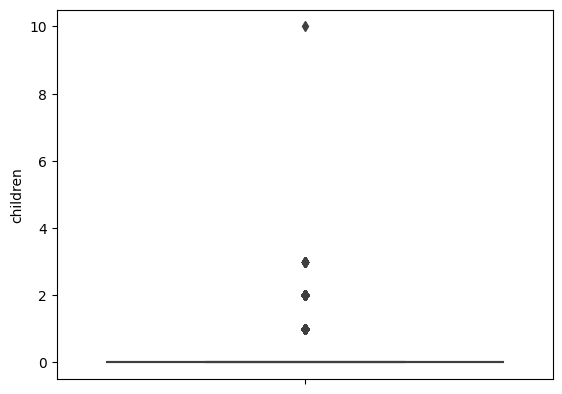

In [266]:
sns.boxplot(y=hotel.children)

In [267]:
hotel.children.agg(['min','max']).reset_index()

,index,children
0,min,0.0
1,max,10.0


In [268]:
#z-score
media_children =  np.mean(hotel_cpy.children)
std_children = np.std(hotel_cpy.children)
hotel_cpy['z_children'] = (hotel_cpy.children - media_children)/std_children

In [269]:
hotel_cpy[hotel_cpy['z_children']>3].sort_values(by='z_children', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children
49181,Resort Hotel,55,2015,July,29,12,4,10,2,10.0,...,NaN,0,Contract,133.16,0,1,44093355-c1c8-41eb-bcb4-40dc494fa1a9,1,0.644430,24.563104
61903,City Hotel,140,2017,June,26,28,0,3,2,3.0,...,NaN,0,Transient,220.00,0,0,a24e074b-8bbc-47ab-9154-70592f1fac09,0,2.462793,7.186660
11077,City Hotel,11,2016,July,28,4,1,0,2,3.0,...,NaN,0,Transient,267.00,0,3,3de76da7-158a-4487-bc08-9c6e0bfcb15d,0,3.446937,7.186660
17732,Resort Hotel,8,2016,June,26,23,0,2,2,3.0,...,NaN,0,Transient,186.00,1,0,2ab8ea4f-48b2-4a27-b4d8-fa19953719d6,0,1.750859,7.186660
29295,City Hotel,109,2017,June,26,25,2,1,2,3.0,...,NaN,0,Transient,255.00,0,3,f9596bc3-2bb9-4ed3-ae3f-553ab556b0ac,1,3.195666,7.186660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21162,City Hotel,37,2017,May,22,29,1,2,2,2.0,...,NaN,0,Transient,270.00,0,0,79ba9158-b984-4c12-968a-affeeea54b6f,1,3.509754,4.704310
21153,City Hotel,179,2017,April,14,7,1,2,0,2.0,...,NaN,0,Transient,110.68,0,1,3e0e2e15-0a97-4637-91ae-e5eb42caf0c9,1,0.173717,4.704310
21144,City Hotel,56,2016,December,52,19,1,0,2,2.0,...,NaN,0,Transient,156.60,0,1,87c3156d-d385-4597-9f78-55c808b9195c,1,1.135246,4.704310
21128,City Hotel,40,2016,September,37,4,2,5,0,2.0,...,NaN,0,Transient,106.90,0,0,856f09e5-6d6d-44bf-9fa5-dd59b5866b28,1,0.094566,4.704310


In [270]:
hotel_cpy[hotel_cpy['z_children']<3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,NaN,0,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,0.274644,-0.260388
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,NaN,0,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,-1.264390,-0.260388
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,NaN,0,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,-0.573395,-0.260388
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,NaN,0,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,-0.573395,-0.260388
5,City Hotel,1,2015,September,38,14,3,5,1,0.0,...,NaN,0,Transient,133.00,0,0,8f62c6f7-60a5-4b54-8ced-faaf9213a7a7,0,0.641080,-0.260388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,NaN,0,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,-1.138754,-0.260388
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,NaN,0,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,0.976108,-0.260388
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,153.0,0,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,-0.154611,-0.260388
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,NaN,0,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,-1.388978,-0.260388


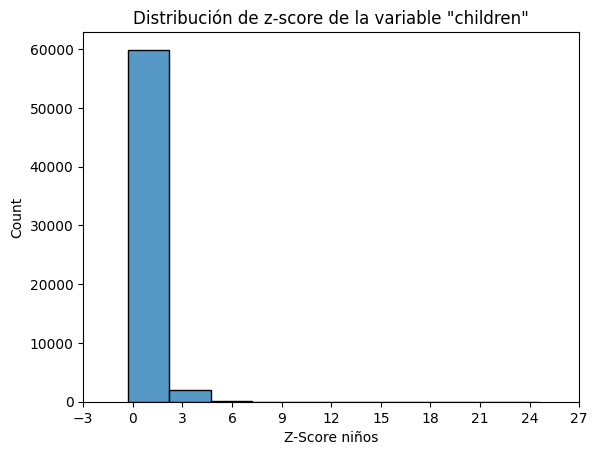

In [271]:
sns.histplot(hotel_cpy.z_children, bins=10).set(title='Distribución de z-score de la variable "children"', xlabel='Z-Score niños')

plt.xticks(np.arange(-3, 30, 3))

plt.show()

In [272]:
#z-score modificado
mediana_children = np.median(hotel_cpy.children)
MAD = np.median(np.absolute(hotel_cpy.children-mediana_children))
hotel_cpy['zm_children'] = (hotel_cpy.children - mediana_children)*0.6745/MAD

In [273]:
hotel_cpy[hotel_cpy['zm_children']>3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children


In [274]:
hotel_cpy[hotel_cpy['zm_children']<3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children


Podemos ver que la variable ``'children'`` tiene outliers moderados pero no severos.

<Axes: ylabel='babies'>

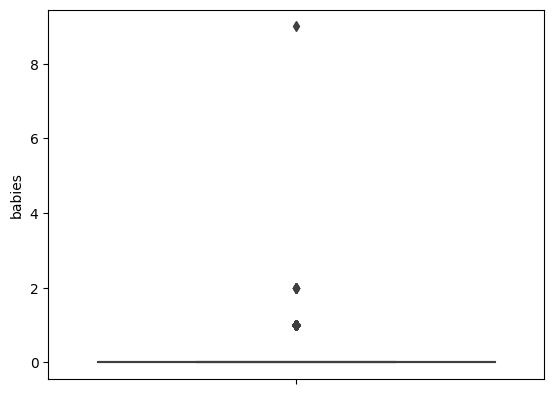

In [275]:
sns.boxplot(y=hotel.babies)

In [276]:
hotel.babies.agg(['min','max']).reset_index()

,index,babies
0,min,0
1,max,9


In [277]:
#z-score
media_babies = np.mean(hotel_cpy.babies)
std_babies = np.std(hotel_cpy.babies)
hotel_cpy['z_babies'] = (hotel_cpy.babies - media_babies)/std_babies

In [278]:
hotel_cpy[hotel_cpy['z_babies']>3].sort_values(by='z_babies', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies
12659,City Hotel,11,2015,October,42,11,2,1,1,0.0,...,Transient-Party,95.00,0,0,a864cf91-980a-48da-9b71-c0b487096239,0,-0.154611,-0.260388,NaN,97.580995
47646,Resort Hotel,345,2016,September,36,1,2,7,2,0.0,...,Transient,145.00,0,1,a20ef39a-c517-4393-9284-1d2b365b5b2b,1,0.892351,-0.260388,NaN,21.624278
6675,City Hotel,13,2017,March,11,18,0,1,2,1.0,...,Transient,152.00,1,2,ab8888e4-9a15-4f6f-b5ab-18ce275944e5,0,1.038925,2.221961,NaN,21.624278
47353,City Hotel,11,2016,September,39,20,0,2,2,0.0,...,Transient,248.00,0,2,7bfd67d5-c86b-49f2-a336-61781a6cb3f8,0,3.049091,-0.260388,NaN,21.624278
50487,Resort Hotel,116,2016,June,27,26,3,5,2,0.0,...,Transient,145.88,0,0,6c57466f-9fc9-417a-925d-042b4f33d77e,1,0.910777,-0.260388,NaN,21.624278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20534,Resort Hotel,197,2016,August,32,5,2,4,2,0.0,...,Transient,148.00,0,1,737f080f-b0df-4553-ac7d-94f2c42bfad6,0,0.955169,-0.260388,NaN,10.773319
20232,Resort Hotel,124,2016,May,21,18,0,4,2,0.0,...,Transient,60.00,0,2,502fc957-3d67-4e59-bf85-dc37f0420179,0,-0.887483,-0.260388,NaN,10.773319
19740,Resort Hotel,1,2017,February,5,4,0,1,2,0.0,...,Transient,55.00,1,0,4c4ed701-7b16-455f-83ae-4e345d5cef86,0,-0.992180,-0.260388,NaN,10.773319
19480,Resort Hotel,13,2016,June,24,8,0,4,2,1.0,...,Transient,166.00,1,1,2adafcea-d219-497b-afb6-f3c4f3275ded,0,1.332075,2.221961,NaN,10.773319


In [279]:
hotel_cpy[hotel_cpy['z_babies']<3]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,Transient,115.50,0,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,0.274644,-0.260388,NaN,-0.077641
1,Resort Hotel,4,2015,October,44,31,0,1,2,0.0,...,Transient,42.00,1,0,b1428f80-c56c-4ae4-91a9-6962edae08b1,0,-1.264390,-0.260388,NaN,-0.077641
2,City Hotel,25,2016,October,42,13,0,1,2,2.0,...,Transient,229.00,0,2,2226c018-ea20-4c4e-8f71-ea66aee70d7c,0,2.651246,4.704310,NaN,-0.077641
3,City Hotel,26,2016,December,51,12,2,5,2,0.0,...,Transient,75.00,0,0,314f56dc-2e4d-4298-9bdd-27bb008bffff,1,-0.573395,-0.260388,NaN,-0.077641
4,City Hotel,104,2017,March,12,19,2,5,2,0.0,...,Transient-Party,75.00,0,1,28c75445-c603-413a-babf-ad377018b592,0,-0.573395,-0.260388,NaN,-0.077641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61908,Resort Hotel,24,2017,January,4,27,0,2,2,0.0,...,Transient,48.00,0,1,32bffef5-5404-4e86-9f39-fd2282e1ad7f,1,-1.138754,-0.260388,NaN,-0.077641
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,Transient,149.00,0,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,0.976108,-0.260388,NaN,-0.077641
61910,City Hotel,10,2017,May,19,8,1,2,1,0.0,...,Transient,95.00,0,0,76fb0e83-59df-43ee-9c33-aec51030ed45,0,-0.154611,-0.260388,NaN,-0.077641
61911,Resort Hotel,143,2015,October,41,10,2,5,2,0.0,...,Transient,36.05,0,0,01906859-1094-4e37-b13e-b015b594d159,1,-1.388978,-0.260388,NaN,-0.077641


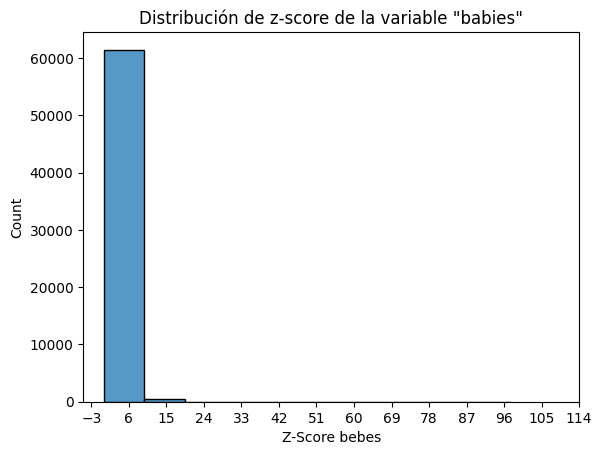

In [280]:
sns.histplot(hotel_cpy.z_babies, bins=10).set(title='Distribución de z-score de la variable "babies"', xlabel='Z-Score bebes')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

In [281]:
#z-score modificado
mediana_babies = np.median(hotel_cpy.babies)
MAD = np.median(np.absolute(hotel_cpy.babies-mediana_babies))
hotel_cpy['zm_babies'] = (hotel_cpy.babies - mediana_babies)*0.6745/MAD

In [282]:
hotel_cpy[hotel_cpy['zm_babies']>3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies
147,Resort Hotel,60,2015,July,29,12,2,2,2,0.0,...,107.00,0,2,c360712b-51f9-4cb2-ae99-c7318e329c1c,0,0.096660,-0.260388,NaN,10.773319,inf
184,Resort Hotel,93,2015,December,52,26,2,3,2,0.0,...,48.42,0,1,031bae88-eab7-4711-8d3c-def23a756fd8,0,-1.129960,-0.260388,NaN,10.773319,inf
262,City Hotel,88,2015,December,53,29,0,4,2,0.0,...,91.16,0,1,02345d6b-4d87-4e93-8997-a6fc0903e1b9,1,-0.235017,-0.260388,NaN,10.773319,inf
621,City Hotel,1,2017,July,28,13,0,1,3,0.0,...,283.00,2,1,5a0d9f70-f093-48bd-a9de-f7cd1ec9e9df,0,3.781964,-0.260388,NaN,10.773319,inf
704,City Hotel,4,2016,November,47,19,0,1,2,0.0,...,99.00,1,2,7229e2a7-3b45-41e8-bf5a-62323838c444,0,-0.070854,-0.260388,NaN,10.773319,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61454,City Hotel,18,2015,October,44,28,0,4,2,1.0,...,131.50,0,1,3606b7d1-0c1e-450f-b2fa-c4cb08768cac,0,0.609671,2.221961,NaN,10.773319,inf
61597,City Hotel,44,2016,July,28,9,0,1,2,1.0,...,131.40,0,1,34604620-080f-49b2-83e4-5d92cd95bfb8,0,0.607577,2.221961,NaN,10.773319,inf
61632,Resort Hotel,18,2015,December,50,7,1,0,2,0.0,...,93.00,0,2,edee08fa-4fe1-42e9-94db-b15746b89ea6,0,-0.196489,-0.260388,NaN,10.773319,inf
61637,Resort Hotel,117,2016,May,20,14,2,5,2,0.0,...,73.00,0,2,853d786b-05ed-4b6e-bce1-36be9d90500d,1,-0.615274,-0.260388,NaN,10.773319,inf


In [283]:
hotel_cpy[hotel_cpy['zm_babies']<3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies


El zscore modificado me dio infinito en este caso, se puede deber a que el valor de MAD haya dado cero por la cantidad de valores iguales que hay en la variable. Por lo tanto, no me es útil para detectar outliers en esta variable.

<Axes: ylabel='adults'>

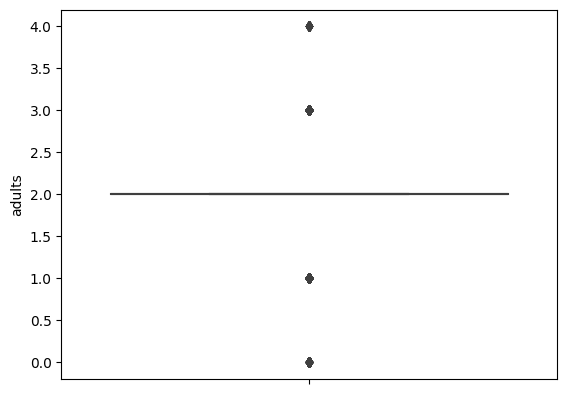

In [284]:
sns.boxplot(y=hotel.adults)

In [285]:
hotel.adults.agg(['min','max']).reset_index()

,index,adults
0,min,0
1,max,4


In [286]:
#z-score
media_adults = np.mean(hotel_cpy.adults)
std_adults = np.std(hotel_cpy.adults)
hotel_cpy['z_adults'] = (hotel_cpy.adults - media_adults)/std_adults

In [287]:
hotel_cpy[hotel_cpy['z_adults']>3].sort_values(by='z_adults', ascending=False)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies,z_adults
59165,Resort Hotel,338,2015,October,41,4,2,0,55,0.0,...,0,0,9bf89c35-d6aa-4dfb-a0cb-2a3eb30bafd2,1,-2.143837,-0.260388,NaN,-0.077641,NaN,90.206541
4064,Resort Hotel,304,2015,September,36,3,0,3,40,0.0,...,0,0,ebb06f2f-1c79-490c-ae9f-8f7ba838d328,1,-2.143837,-0.260388,NaN,-0.077641,NaN,64.742311
55112,Resort Hotel,349,2015,September,39,21,1,3,27,0.0,...,0,0,6ed0d330-fea1-4b4e-b9e8-cbdcdc514d7c,1,-2.143837,-0.260388,NaN,-0.077641,NaN,42.673311
38305,Resort Hotel,340,2015,September,37,12,2,5,26,0.0,...,0,0,f386dc39-94e7-4b56-9609-d12d80d9a6a8,1,-2.143837,-0.260388,NaN,-0.077641,NaN,40.975696
59059,Resort Hotel,333,2015,September,36,5,2,5,26,0.0,...,0,0,62e325e1-4d46-4794-8d32-100a756074db,1,-2.143837,-0.260388,NaN,-0.077641,NaN,40.975696
19146,Resort Hotel,354,2015,September,39,26,2,5,26,0.0,...,0,0,edcaa4e3-8b46-4812-9d09-672cd8b73589,1,-2.143837,-0.260388,NaN,-0.077641,NaN,40.975696
11830,Resort Hotel,334,2015,October,42,12,2,5,20,0.0,...,0,0,b169d836-a93c-43a3-8bb4-9ec2afa66483,1,-2.143837,-0.260388,NaN,-0.077641,NaN,30.790004
35477,Resort Hotel,334,2015,October,42,12,2,5,10,0.0,...,0,0,a2928fc5-26a1-4e9c-9be9-1d89f03dccf5,1,-2.143837,-0.260388,NaN,-0.077641,NaN,13.813850
13101,Resort Hotel,328,2015,October,41,6,2,5,6,0.0,...,0,0,653ecbda-b99c-4aaf-b118-3c1877b57abb,1,-2.143837,-0.260388,NaN,-0.077641,NaN,7.023389
3962,Resort Hotel,328,2015,October,41,6,2,5,5,0.0,...,0,0,54e377ff-6236-44f0-81e7-ab8750d6998a,1,-2.143837,-0.260388,NaN,-0.077641,NaN,5.325774


In [288]:
hotel_cpy[hotel_cpy['z_adults']<3].sort_values(by='z_adults', ascending=True)

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,required_car_parking_spaces,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies,z_adults
45578,City Hotel,7,2016,March,10,4,2,2,0,2.0,...,0,1,88123286-d009-4bd5-941b-148ced797676,1,-0.343901,4.704310,NaN,-0.077641,NaN,-3.162303
31681,City Hotel,1,2017,June,26,28,0,0,0,0.0,...,0,0,8f7ab6a5-b1d8-4c62-b818-9e6a440ae240,0,-2.143837,-0.260388,NaN,-0.077641,NaN,-3.162303
41786,City Hotel,128,2017,January,1,6,1,2,0,2.0,...,0,0,1b436781-1fd5-4780-bec9-de6893adc573,0,-0.417607,4.704310,NaN,-0.077641,NaN,-3.162303
42053,City Hotel,209,2017,May,21,21,2,4,0,2.0,...,0,1,15247d1a-7e15-4cf9-96f3-bcb77205a9d2,1,0.175182,4.704310,NaN,-0.077641,NaN,-3.162303
10018,City Hotel,42,2016,August,35,27,8,20,0,0.0,...,0,1,7dc77c3a-face-4ebb-913a-cc914336b011,0,-2.143837,-0.260388,NaN,-0.077641,NaN,-3.162303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37295,Resort Hotel,44,2016,December,53,25,2,0,3,1.0,...,1,2,3cc284f9-3af6-4542-ba4c-a747c5c59875,0,0.180417,2.221961,NaN,-0.077641,NaN,1.930543
21355,City Hotel,74,2017,April,14,7,0,2,3,0.0,...,0,0,763f5d89-e2aa-476b-94bb-0b47be3def69,0,1.813677,-0.260388,NaN,-0.077641,NaN,1.930543
43736,Resort Hotel,130,2016,October,43,21,0,1,3,1.0,...,0,0,06061d27-0166-46fc-a965-67116e207589,1,0.326992,2.221961,NaN,-0.077641,NaN,1.930543
37280,City Hotel,61,2015,December,52,24,0,3,3,0.0,...,0,2,2f50a49f-3eef-4f89-87f9-c115307b59ab,1,1.043113,-0.260388,NaN,-0.077641,NaN,1.930543


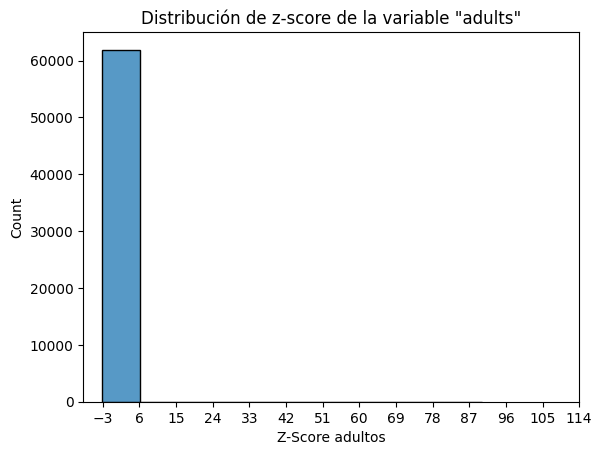

In [289]:
sns.histplot(hotel_cpy.z_adults, bins=10).set(title='Distribución de z-score de la variable "adults"', xlabel='Z-Score adultos')

plt.xticks(np.arange(-3, 120, 9))

plt.show()

In [290]:
#z-score modificado
mediana_adults = np.median(hotel_cpy.adults)
MAD = np.median(np.absolute(hotel_cpy.adults-mediana_adults))
hotel_cpy['zm_adults'] = (hotel_cpy.adults - mediana_adults)*0.6745/MAD

In [291]:
hotel_cpy[hotel_cpy['zm_adults']>3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies,z_adults,zm_adults
26,City Hotel,315,2017,April,15,13,0,3,3,0.0,...,0,83bcccd7-a124-4049-9d58-bcad4ef345cd,1,0.888163,-0.260388,NaN,-0.077641,NaN,1.930543,inf
40,City Hotel,86,2017,July,27,3,1,0,3,0.0,...,0,c4b9467a-f53f-49f1-ae89-91369d24bafe,0,1.834616,-0.260388,NaN,-0.077641,NaN,1.930543,inf
80,City Hotel,200,2016,September,39,20,1,5,3,0.0,...,0,4d52e70f-49dc-461f-9fcc-7a43771ed7ca,1,1.006470,-0.260388,NaN,-0.077641,NaN,1.930543,inf
83,Resort Hotel,364,2016,October,42,12,0,4,3,0.0,...,0,e8be0138-a147-475e-817d-62f3a01bba63,0,-0.028975,-0.260388,NaN,-0.077641,NaN,1.930543,inf
85,City Hotel,177,2017,June,26,26,1,2,3,0.0,...,2,97306681-7fb5-4aee-ab9a-6ce722d96781,1,1.059865,-0.260388,NaN,-0.077641,NaN,1.930543,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61881,City Hotel,32,2017,March,10,10,2,7,3,0.0,...,0,dd95eab4-eb4b-45ca-a873-8af1e4ac0681,0,0.609043,-0.260388,NaN,-0.077641,NaN,1.930543,inf
61882,City Hotel,87,2017,August,31,3,0,2,3,0.0,...,1,62d7640a-b7c6-496d-b5b4-37f18c3ebdee,0,1.939312,-0.260388,NaN,-0.077641,NaN,1.930543,inf
61889,City Hotel,4,2017,February,6,10,0,2,3,2.0,...,0,c7981146-048c-4ec2-8c14-9df1ba8708af,1,3.363180,4.704310,NaN,-0.077641,NaN,1.930543,inf
61897,City Hotel,224,2017,July,29,17,1,1,3,0.0,...,0,aa0d1d87-673c-4b87-bda5-ef65516a2fc5,0,1.135246,-0.260388,NaN,-0.077641,NaN,1.930543,inf


In [292]:
hotel_cpy[hotel_cpy['zm_adults']<3.5]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,total_of_special_requests,id,is_canceled,z_adr,z_children,zm_children,z_babies,zm_babies,z_adults,zm_adults
0,City Hotel,49,2016,September,37,5,1,2,1,0.0,...,1,7aa4cc6b-b92c-4061-b21d-4f9e0cac4689,1,0.274644,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
5,City Hotel,1,2015,September,38,14,3,5,1,0.0,...,0,8f62c6f7-60a5-4b54-8ced-faaf9213a7a7,0,0.641080,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
11,City Hotel,349,2016,October,41,4,1,5,1,0.0,...,0,e1df43c0-7b84-4bb2-857c-760926c881f5,1,-0.468699,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
13,City Hotel,41,2016,September,38,14,0,3,1,0.0,...,0,38c787b2-1746-4baa-962b-7770404d25c1,0,0.117599,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
25,City Hotel,8,2017,February,7,15,0,2,1,0.0,...,0,6356ca06-9a12-48a3-9747-19ae87374d86,0,-0.782787,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61901,City Hotel,351,2015,October,40,3,2,2,1,0.0,...,0,40653194-6629-4340-8fc4-c2ad154bb887,1,-0.887483,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
61904,City Hotel,58,2016,January,5,27,0,2,1,0.0,...,0,c1050008-6283-45b7-bf08-497449dfea26,1,-0.468699,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
61907,City Hotel,296,2016,September,39,21,0,4,1,0.0,...,0,8442e317-2c5d-4751-a664-17c12d9fa9ba,0,-0.133671,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf
61909,City Hotel,0,2016,September,36,2,0,1,1,0.0,...,0,cc922a1c-356e-42a5-a984-0b1af03c2f5c,0,0.976108,-0.260388,NaN,-0.077641,NaN,-1.464688,-inf


<Axes: ylabel='previous_cancellations'>

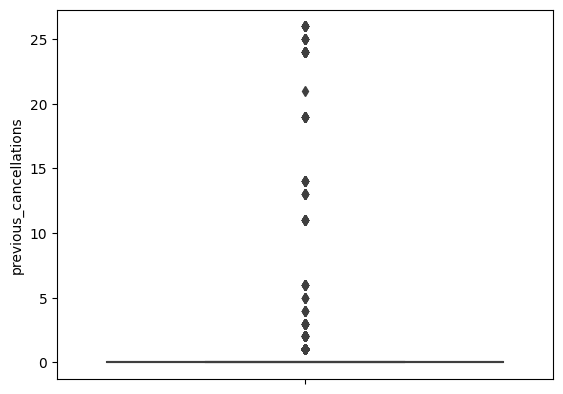

In [293]:
sns.boxplot(y=hotel.previous_cancellations)

In [294]:
hotel.agg(['min','max']).reset_index()

,index,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled
0,min,City Hotel,0,2015,April,1,1,0,0,0,...,No Deposit,1.0,9.0,0,Contract,0.5,0,0,0000aab4-4a77-4d46-96ce-cf4d287f86fd,0
1,max,Resort Hotel,629,2017,September,53,31,16,40,4,...,Refundable,535.0,543.0,391,Transient-Party,245.5,8,5,ffff7b1f-6842-4773-be10-1b9009045ad8,1


##### Multivariada

#### Características

#### Tratamiento

## BORRADOR ///

In [295]:
# ¿Existe alguna relación entre el tiempo en lista de espera y las reservas canceladas?
pd.crosstab(hotel['days_in_waiting_list'], hotel['is_canceled'])

is_canceled,0,1
days_in_waiting_list,,
0,29299,28736
1,4,2
2,2,1
3,0,41
4,9,6
...,...,...
236,13,3
259,5,0
330,6,1


In [296]:
# Reservas canceladas por tarifa
pd.crosstab(hotel['adr'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
adr,,
62.00,290,2106
90.00,420,1021
75.00,650,852
80.00,332,753
120.00,270,699
...,...,...
135.52,1,0
71.89,1,0
135.56,1,0


<Axes: xlabel='adr', ylabel='is_canceled'>

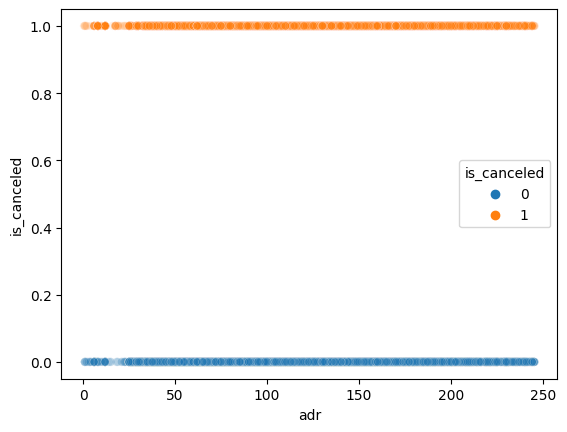

In [297]:
# Graficar canceldas por tarifa
sns.scatterplot(x='adr', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.1)

In [298]:
# Reservas canceladas por pais
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
country,,
PRT,8023,18924
GBR,3983,1657
ESP,2558,1458
FRA,3422,1315
ITA,971,913
...,...,...
SDN,1,0
PRY,2,0
RWA,1,0


<Axes: xlabel='country'>

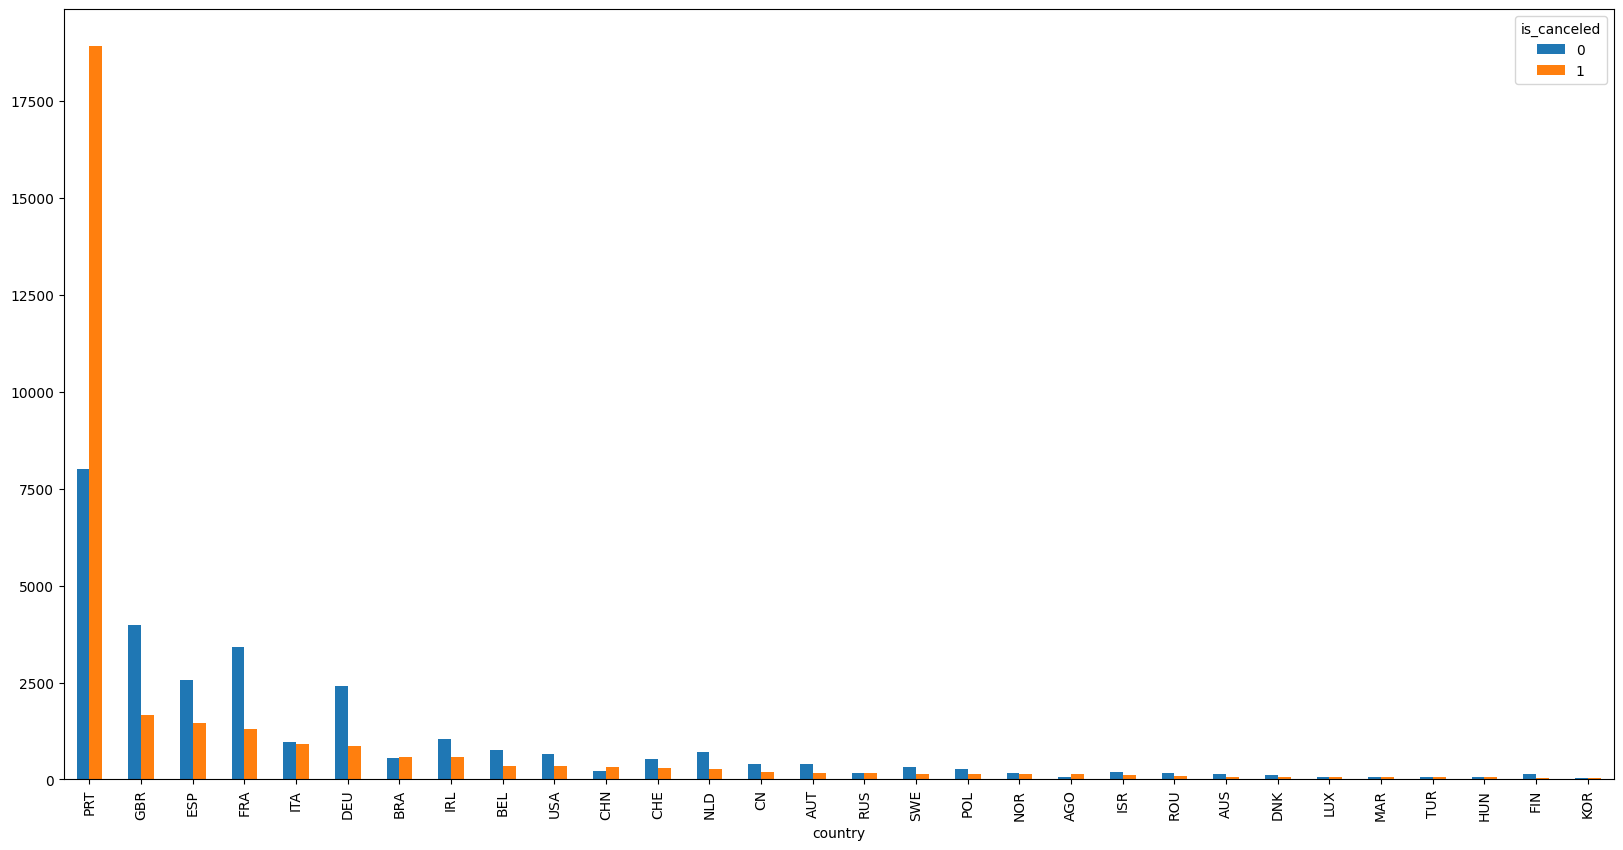

In [299]:
# graficar canceladas por 30 primeros paises
pd.crosstab(hotel['country'], hotel['is_canceled']).sort_values(by=1, ascending=False).head(30).plot(kind='bar', figsize=(20,10))


In [300]:
# Reservas canceladas segun el tipo de comida
pd.crosstab(hotel['meal'], hotel['is_canceled']).sort_values(by=1, ascending=False)


is_canceled,0,1
meal,,
BB,22931,23782
HB,3750,3309
SC,2720,2752
FB,118,326
Undefined,363,203


<Axes: xlabel='meal', ylabel='count'>

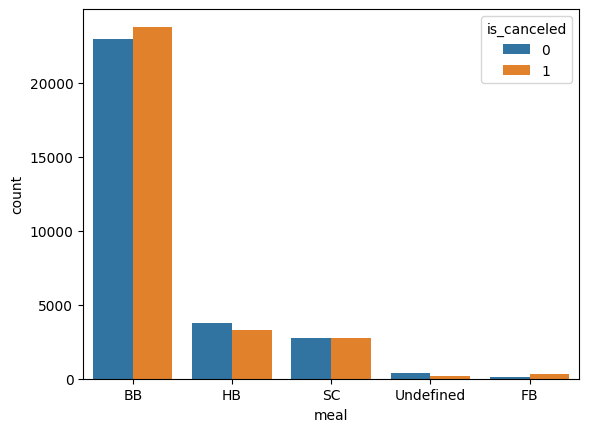

In [301]:
# graficareservas canceladas segun el tipo de comida
sns.countplot(x='meal', data=hotel, hue='is_canceled')

In [302]:
# Estado de las reservas segun el tipo de distribucion
pd.crosstab(hotel['distribution_channel'], hotel['is_canceled']).sort_values(by=1, ascending=False)

is_canceled,0,1
distribution_channel,,
TA/TO,23133,27702
Direct,4610,1622
Corporate,2076,1018
GDS,63,26
Undefined,0,4


<Axes: xlabel='distribution_channel', ylabel='count'>

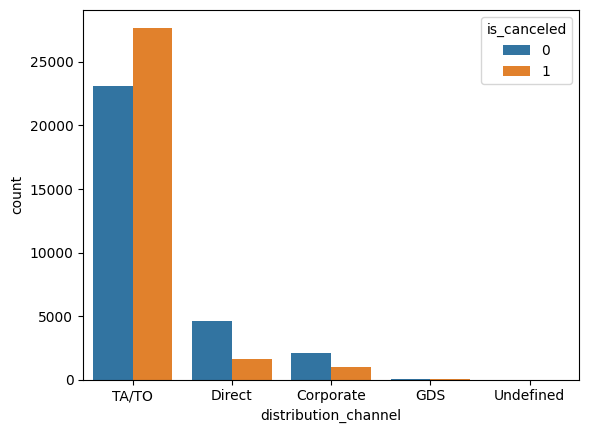

In [303]:
# graficar reservas canceladas segun el tipo de distribucion
sns.countplot(x='distribution_channel', data=hotel, hue='is_canceled')

ModuleNotFoundError: No module named 'statsmodels'

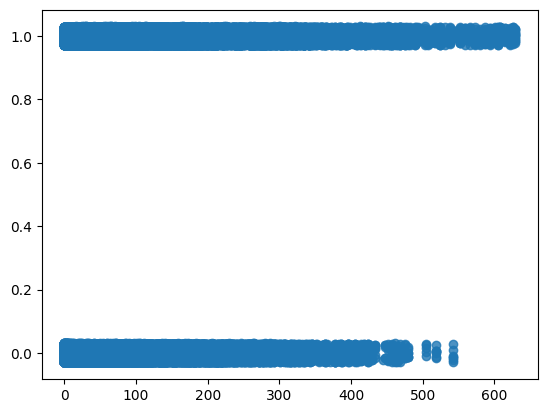

In [304]:
# graficar reservas canceladas segun el tiempo entre la reserva y la llegada
# sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled', alpha=0.002)

sns.regplot(x='lead_time', y='is_canceled', data=hotel, logistic=True, y_jitter=0.03)


In [ ]:
# ¿Existe alguna relación entre la cantidad de adultos, niños y bebés en una reserva y el estado de la reserva?

pd.crosstab(index=[hotel['adults'], hotel['children'], hotel['babies']], columns=hotel['is_canceled']).sort_values(by=1, ascending=False).head(10)


In [ ]:
sns.scatterplot(x='lead_time', y='is_canceled', data=hotel, hue='is_canceled')
plt.gca().set_title('Relación entre el tiempo de espera y el estado de la reserva')
plt.gca().set_xlabel('Tiempo de espera')
plt.gca().set_ylabel('Estado de la reserva')
plt.gca().set_xticks(range(0, 700, 50))
plt.gca().set_yticks(range(0, 2, 1))
plt.show()

In [ ]:
sns.countplot(x='previous_cancellations', hue='is_canceled', data=hotel)
plt.show()

In [ ]:
# graficar relacion entre 'arrival_date_year' y 'is_canceled'
# sns.countplot(x='arrival_date_year', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_month', hue='is_canceled', data=hotel)
# sns.countplot(x='arrival_date_day_of_month', hue='is_canceled', data=hotel)
sns.countplot(x='arrival_date_week_number', hue='is_canceled', data=hotel)


In [ ]:
hotel_reducido = hotel.copy()

# combinar las columnas de fechas en una sola
hotel_reducido['arrival_date'] = hotel_reducido['arrival_date_year'].astype(str) + '-' + hotel_reducido['arrival_date_month'].astype(str) + '-' + hotel_reducido['arrival_date_day_of_month'].astype(str)
# eliminar las columnas de fechas
hotel_reducido.drop(['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'], axis=1, inplace=True)

# convertir la columna 'arrival_date' a tipo datetime
hotel_reducido['arrival_date'] = pd.to_datetime(hotel_reducido['arrival_date'])

hotel_reducido.head()

In [ ]:
# graficar la relacion entre 'arrival_date' y 'is_canceled'
sns.scatterplot(x='arrival_date', y='is_canceled', data=hotel_reducido, hue='is_canceled', alpha=0.05)

In [ ]:
# graficar la relacion entre 'hotel' y 'is_canceled'
sns.countplot(x='hotel', hue='is_canceled', data=hotel_reducido)

In [ ]:
# heatmap hotel y deposit_type
sns.heatmap(pd.crosstab(hotel_reducido['hotel'], hotel_reducido['deposit_type']), annot=True, fmt='d')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data into a pandas DataFrame
# ...

# Pivot the data to create a matrix with 'hotel' and 'deposit_type' as the row and column indices
# and 'is_canceled' as the values
pivot_df = hotel_reducido.pivot_table(
    index='hotel', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Set the plot title and axis labels
plt.title('Cancellation Rates by Hotel and Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Hotel')

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_df = hotel_reducido.pivot_table(
    index='customer_type', columns='deposit_type', values='is_canceled')

# Create the heatmap using Seaborn
sns.heatmap(pivot_df, cmap='coolwarm', annot=True, fmt='.2f')

# Show the plot
plt.show()


In [ ]:
# dropeamos company xq son la mayoria nulos
hotel_reducido.drop('company', axis=1, inplace=True)
hotel_reducido.info()

In [ ]:
# graficar relacion entre 20 agents mas comunes y 'is_canceled'
top_20_agents = hotel_reducido['agent'].value_counts().head(20).index
sns.countplot(x='agent', hue='is_canceled', data=hotel_reducido[hotel_reducido['agent'].isin(top_20_agents)])


In [ ]:
# graficar cantidad de bebes por reserva, sacando los registros con 0 'babies'
sns.countplot(x='babies', data=hotel_reducido[hotel_reducido['babies'] > 1])

In [ ]:
# graficar cantidad de 'children' por reserva
sns.countplot(x='children', data=hotel_reducido[hotel_reducido['children'] > 3])

Revisaremos entonces la distribución de agentes y compañías respecto al target del modelo, la columna ``is_canceled``.



In [ ]:
sns.countplot(y='company', data=hotel, hue='is_canceled',
              order=hotel['company'].value_counts().iloc[:30].index)

# Calculamos la cantidad de agentes y compañías únicos:
len(df['agent'].unique())

len(df['company'].unique())
# calcular cuantos valores unicos de 'company' hay ent
# graficar 'agent' contra 'is_canceled', ordenar por apariciones, los 30 primeros
sns.countplot(y='agent', data=hotel, hue='is_canceled',
              order=hotel['agent'].value_counts().iloc[:30].index)

# create a new column 'is_used_agent' that is 1 if 'agent' is not null, 0 otherwise
_hotel = hotel.copy()
_hotel['is_used_agent'] = _hotel['agent'].notna().astype(int)
_hotel['is_used_agent'].value_counts()

# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()

# create a new column 'is_used_company' that is 1 if 'company' is not null, 0 otherwise
_hotel['is_used_company'] = _hotel['company'].notna().astype(int)
_hotel['is_used_company'].value_counts()
